In [1]:
import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/")

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
x_train = mnist.train.images[:55000,:]
x_train.shape
#这里注意下是784个pixel training的时候shape要一致

(55000, 784)

### Genetor

In [4]:
def generator(z):
    with tf.variable_scope("generator",reuse = tf.AUTO_REUSE):
        init = tf.contrib.layers.xavier_initializer()
        cov_1 = tf.layers.dense(inputs = z, units = 128, activation = tf.nn.relu, kernel_initializer = init, use_bias = True)
        output_1 = tf.layers.dense(inputs = cov_1, units = 784, activation = tf.nn.tanh, kernel_initializer = init, use_bias = True)
        
        return output_1
        

### Discriminator

In [5]:
def discriminator(x):
    with tf.variable_scope("discriminator",reuse = tf.AUTO_REUSE):
        init = tf.contrib.layers.xavier_initializer()
        cov_1 = tf.layers.dense(inputs = x, units = 128, activation = tf.nn.relu, kernel_initializer = init, use_bias = True)
        logit = tf.layers.dense(inputs = cov_1, units = 1, kernel_initializer = init, use_bias = True)
        
        return logit

### Loss Function

In [6]:
x = tf.placeholder(tf.float32,shape = [None, 784])
z = tf.placeholder(tf.float32,shape = [None,100])

In [7]:
d_loss_real = tf.nn.sigmoid(discriminator(x))
d_loss_fake = tf.nn.sigmoid(discriminator(generator(z)))
d_loss = -tf.reduce_mean(tf.log(d_loss_real) + tf.log(1. - d_loss_fake))
g_loss = -tf.reduce_mean(tf.log(d_loss_fake))

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.


### Optimizers

In [8]:
D_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES,'discriminator')
G_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES,'generator')
D_solver = tf.train.AdamOptimizer(learning_rate = 1e-3,beta1 = 0.5).minimize(d_loss,var_list = D_vars)
G_solver = tf.train.AdamOptimizer(learning_rate = 1e-3,beta1 = 0.5).minimize(g_loss,var_list = G_vars)

### Training

In [9]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

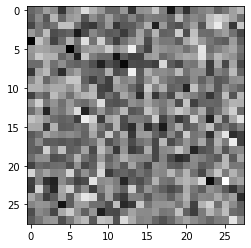

In [25]:
example_1 = sess.run(generator(z),feed_dict = {z: np.random.uniform(-1,1,size = [128,100])} )
#fig = show_images(example_1[:24])
plt.imshow(example_1[1].reshape(28,28), cmap='gray_r')
plt.show()


  0%|          | 0/50000 [00:00<?, ?it/s]

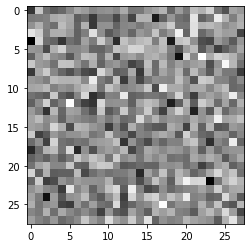


ITER:0
D_cur_loss:1.278281331062317
G_cur_loss:0.87456876039505



  2%|▏         | 991/50000 [00:10<07:46, 104.97it/s]

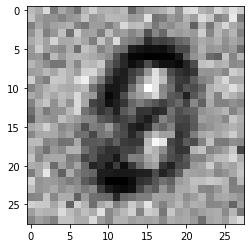


ITER:1000
D_cur_loss:1.0603972673416138
G_cur_loss:1.568869948387146



  4%|▍         | 1990/50000 [00:21<09:12, 86.86it/s] 

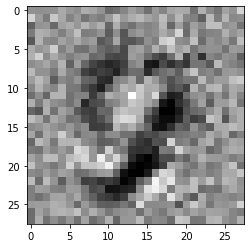


ITER:2000
D_cur_loss:1.165453553199768
G_cur_loss:1.2955939769744873



  6%|▌         | 2997/50000 [00:33<07:43, 101.42it/s]

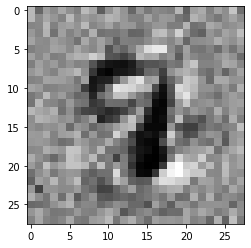


ITER:3000
D_cur_loss:0.9779878854751587
G_cur_loss:1.2179498672485352



  8%|▊         | 4000/50000 [00:43<07:44, 99.11it/s] 

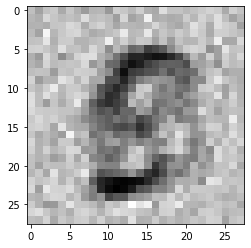


ITER:4000
D_cur_loss:1.0948697328567505
G_cur_loss:1.36078679561615



 10%|▉         | 4992/50000 [00:54<07:44, 96.89it/s] 

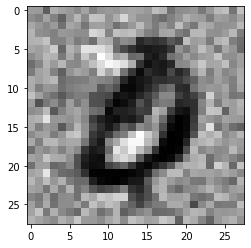


ITER:5000
D_cur_loss:1.2078148126602173
G_cur_loss:1.1439921855926514



 12%|█▏        | 6000/50000 [01:05<08:02, 91.18it/s] 

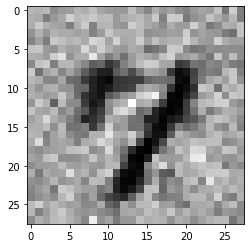


ITER:6000
D_cur_loss:1.2208328247070312
G_cur_loss:1.3256226778030396



 14%|█▍        | 6998/50000 [01:16<07:01, 101.93it/s]

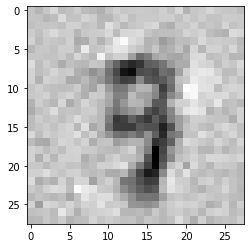


ITER:7000
D_cur_loss:1.0880111455917358
G_cur_loss:1.074345350265503



 16%|█▌        | 7991/50000 [01:26<06:59, 100.26it/s]

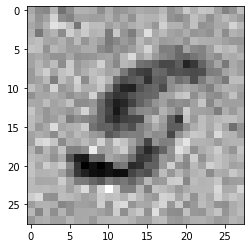


ITER:8000
D_cur_loss:1.120987892150879
G_cur_loss:1.2775914669036865



 18%|█▊        | 8998/50000 [01:37<08:26, 80.98it/s] 

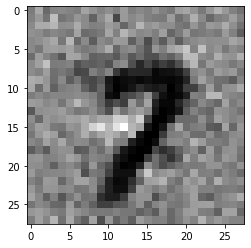


ITER:9000
D_cur_loss:1.1175450086593628
G_cur_loss:1.2079259157180786



 20%|█▉        | 9999/50000 [01:48<06:49, 97.76it/s] 

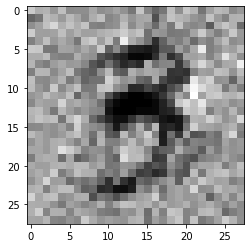


ITER:10000
D_cur_loss:1.2288410663604736
G_cur_loss:1.156467318534851



 22%|██▏       | 10996/50000 [02:00<07:14, 89.80it/s]

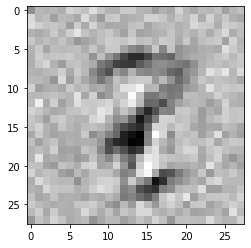


ITER:11000
D_cur_loss:1.064042568206787
G_cur_loss:1.2244863510131836



 24%|██▍       | 12000/50000 [02:11<06:38, 95.28it/s] 

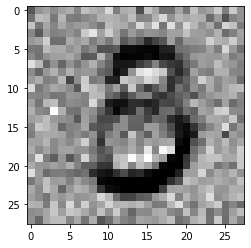


ITER:12000
D_cur_loss:0.9597040414810181
G_cur_loss:1.4183712005615234



 26%|██▌       | 12993/50000 [02:22<06:22, 96.84it/s] 

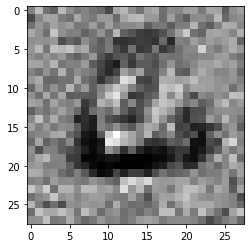


ITER:13000
D_cur_loss:1.0436153411865234
G_cur_loss:1.3440446853637695



 28%|██▊       | 13997/50000 [02:33<05:58, 100.53it/s]

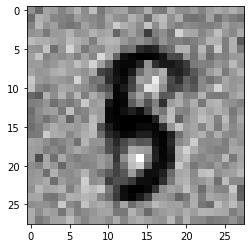


ITER:14000
D_cur_loss:1.0018706321716309
G_cur_loss:1.2787138223648071



 30%|██▉       | 14995/50000 [02:43<05:47, 100.70it/s]

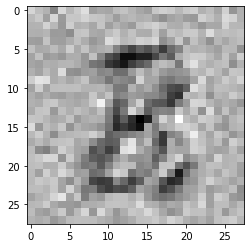


ITER:15000
D_cur_loss:1.005816102027893
G_cur_loss:1.5196822881698608



 32%|███▏      | 15998/50000 [02:56<07:29, 75.67it/s] 

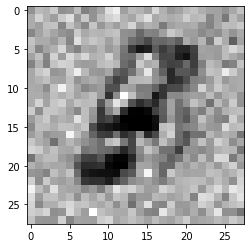


ITER:16000
D_cur_loss:0.9698209762573242
G_cur_loss:1.7032928466796875



 34%|███▍      | 16997/50000 [03:07<05:37, 97.83it/s] 

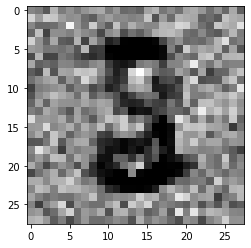


ITER:17000
D_cur_loss:0.9718981385231018
G_cur_loss:1.427340030670166



 36%|███▌      | 17997/50000 [03:18<06:14, 85.39it/s] 

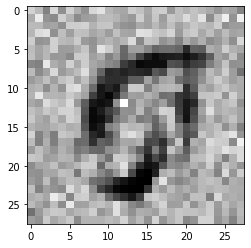


ITER:18000
D_cur_loss:1.028307557106018
G_cur_loss:1.6981213092803955



 38%|███▊      | 18992/50000 [03:28<05:08, 100.39it/s]

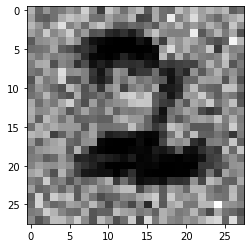


ITER:19000
D_cur_loss:0.8887009620666504
G_cur_loss:1.4733349084854126



 40%|████      | 20000/50000 [03:39<05:09, 96.95it/s] 

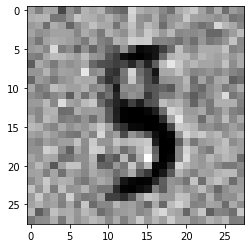


ITER:20000
D_cur_loss:0.9121522903442383
G_cur_loss:1.6687450408935547



 42%|████▏     | 20998/50000 [03:51<05:43, 84.37it/s] 

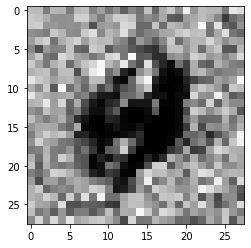


ITER:21000
D_cur_loss:0.8198053240776062
G_cur_loss:1.9501687288284302



 44%|████▍     | 21999/50000 [04:04<05:21, 87.18it/s]

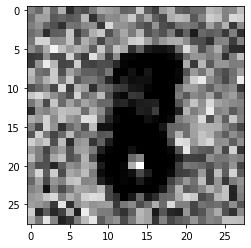


ITER:22000
D_cur_loss:0.7966140508651733
G_cur_loss:1.7065482139587402



 46%|████▌     | 23000/50000 [04:14<04:25, 101.85it/s]

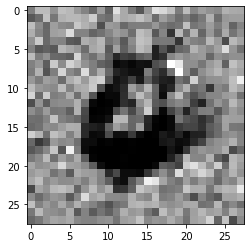


ITER:23000
D_cur_loss:0.7402439713478088
G_cur_loss:1.902369499206543



 48%|████▊     | 23991/50000 [04:26<04:42, 91.93it/s] 

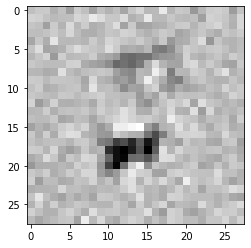


ITER:24000
D_cur_loss:0.7764755487442017
G_cur_loss:1.9131271839141846



 50%|████▉     | 24998/50000 [04:37<05:40, 73.49it/s] 

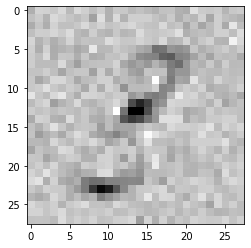


ITER:25000
D_cur_loss:0.8121227622032166
G_cur_loss:2.0969796180725098



 52%|█████▏    | 25992/50000 [04:48<03:59, 100.44it/s]

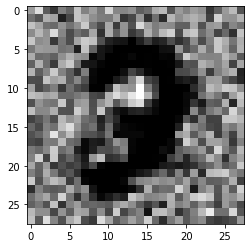


ITER:26000
D_cur_loss:0.8561233878135681
G_cur_loss:2.1144301891326904



 54%|█████▍    | 26992/50000 [04:58<04:03, 94.55it/s] 

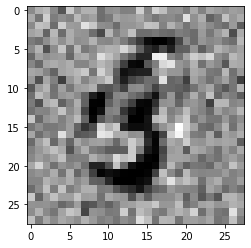


ITER:27000
D_cur_loss:0.7434244155883789
G_cur_loss:1.8158687353134155



 56%|█████▌    | 27996/50000 [05:09<04:17, 85.31it/s] 

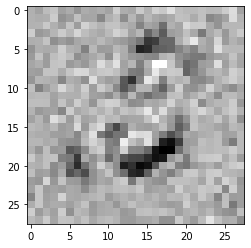


ITER:28000
D_cur_loss:0.8501665592193604
G_cur_loss:1.8798456192016602



 58%|█████▊    | 28992/50000 [05:21<03:48, 92.14it/s] 

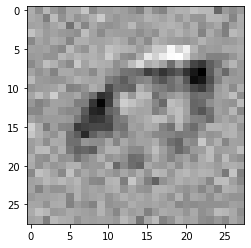


ITER:29000
D_cur_loss:0.6715378165245056
G_cur_loss:2.273847818374634



 60%|█████▉    | 29999/50000 [05:32<03:18, 100.74it/s]

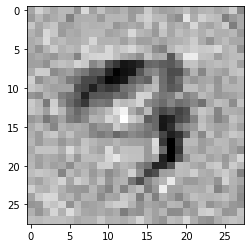


ITER:30000
D_cur_loss:0.8007428646087646
G_cur_loss:1.867850422859192



 62%|██████▏   | 30997/50000 [05:43<03:52, 81.78it/s] 

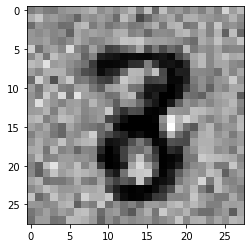


ITER:31000
D_cur_loss:0.6627031564712524
G_cur_loss:2.203263521194458



 64%|██████▍   | 31999/50000 [05:55<04:03, 74.07it/s] 

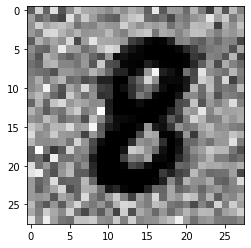


ITER:32000
D_cur_loss:0.7578850388526917
G_cur_loss:2.2405717372894287



 66%|██████▌   | 33000/50000 [06:06<03:27, 82.02it/s] 

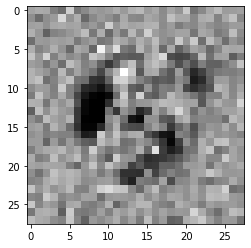


ITER:33000
D_cur_loss:0.7361578941345215
G_cur_loss:2.279043436050415



 68%|██████▊   | 33996/50000 [06:19<03:13, 82.66it/s]

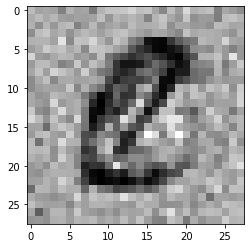


ITER:34000
D_cur_loss:0.6614249348640442
G_cur_loss:2.419713020324707



 70%|██████▉   | 34994/50000 [06:33<03:14, 77.05it/s]

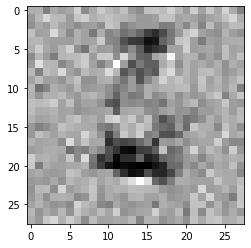


ITER:35000
D_cur_loss:0.6980697512626648
G_cur_loss:2.179334878921509



 72%|███████▏  | 35998/50000 [06:47<03:01, 77.02it/s]

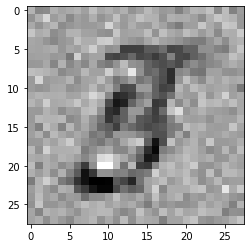


ITER:36000
D_cur_loss:0.5816243886947632
G_cur_loss:2.4792990684509277



 74%|███████▍  | 36997/50000 [07:02<02:42, 79.88it/s]

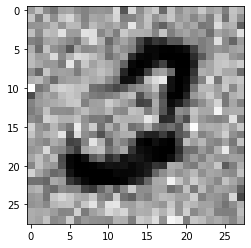


ITER:37000
D_cur_loss:0.6826764941215515
G_cur_loss:2.4844954013824463



 76%|███████▌  | 38000/50000 [07:15<02:28, 81.02it/s]

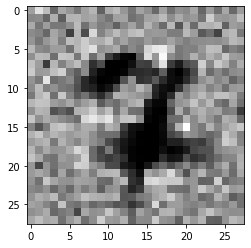


ITER:38000
D_cur_loss:0.7081566452980042
G_cur_loss:2.4623279571533203



 78%|███████▊  | 38993/50000 [07:29<02:11, 83.96it/s]C:\Users\Alienware\Anaconda3\envs\EVM\lib\site-packages\matplotlib\image.py:397: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
C:\Users\Alienware\Anaconda3\envs\EVM\lib\site-packages\matplotlib\image.py:398: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
C:\Users\Alienware\Anaconda3\envs\EVM\lib\site-packages\matplotlib\image.py:405: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
C:\Users\Alienware\Anaconda3\envs\EVM\lib\site-packages\matplotlib\image.py:410: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
C:\Users\Alienware\Anaconda3\envs\EVM\lib\site-packages\matplotlib\colors.py:885: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
C:\Users\Alienware\Anaconda3\envs\EVM\lib\site-packages\numpy\ma\core.py:713: UserWarning:

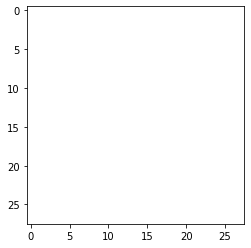


ITER:39000
D_cur_loss:nan
G_cur_loss:nan



 80%|████████  | 40000/50000 [07:40<01:46, 93.47it/s] 

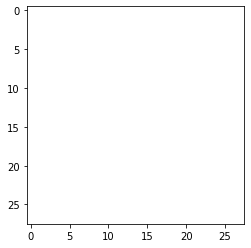


ITER:40000
D_cur_loss:nan
G_cur_loss:nan



 82%|████████▏ | 41000/50000 [07:52<02:06, 71.12it/s] 

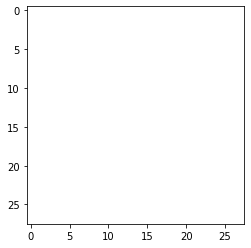


ITER:41000
D_cur_loss:nan
G_cur_loss:nan



 84%|████████▍ | 42000/50000 [08:04<01:26, 92.31it/s] 

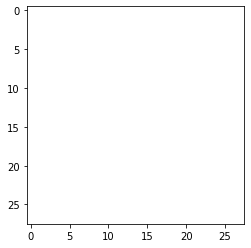


ITER:42000
D_cur_loss:nan
G_cur_loss:nan



 86%|████████▌ | 42995/50000 [08:15<01:13, 95.78it/s] 

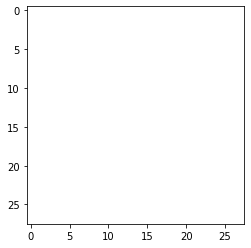


ITER:43000
D_cur_loss:nan
G_cur_loss:nan



 88%|████████▊ | 43995/50000 [08:25<00:57, 104.64it/s]

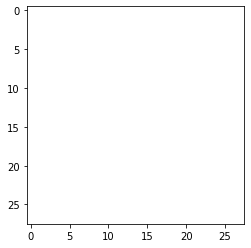


ITER:44000
D_cur_loss:nan
G_cur_loss:nan



 90%|████████▉ | 44997/50000 [08:36<00:49, 101.47it/s]

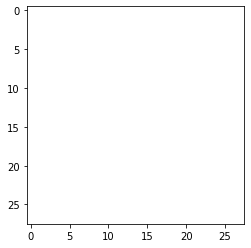


ITER:45000
D_cur_loss:nan
G_cur_loss:nan



 92%|█████████▏| 45989/50000 [08:46<00:39, 102.06it/s]

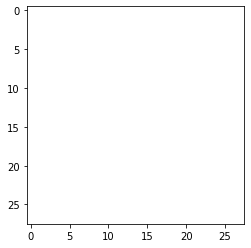


ITER:46000
D_cur_loss:nan
G_cur_loss:nan



 94%|█████████▍| 46995/50000 [08:56<00:28, 105.49it/s]

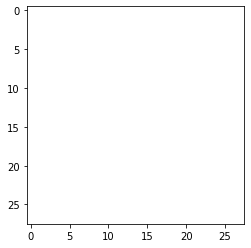


ITER:47000
D_cur_loss:nan
G_cur_loss:nan



 96%|█████████▌| 47994/50000 [09:07<00:27, 72.78it/s] 

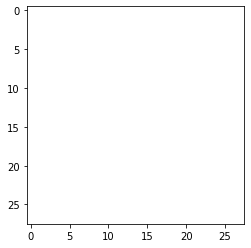


ITER:48000
D_cur_loss:nan
G_cur_loss:nan



 98%|█████████▊| 48996/50000 [09:17<00:09, 106.45it/s]

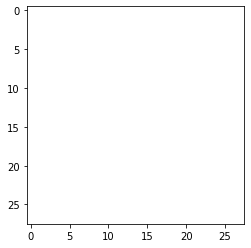


ITER:49000
D_cur_loss:nan
G_cur_loss:nan



100%|██████████| 50000/50000 [09:27<00:00, 88.09it/s] 


In [26]:
for i in tqdm(range(50000)):
    if i % 1000 == 0:
        example_1 = sess.run(generator(z),feed_dict = {z: np.random.uniform(-1,1,size = [196,100])} )
        #fig = show_images(example_1[:24])
        plt.imshow(example_1[1].reshape(28,28), cmap='gray_r')
        plt.show()
        print()
    X,_ = mnist.train.next_batch(196)
    _,d_cur_loss = sess.run([D_solver,d_loss],feed_dict = {x:X,z: np.random.uniform(-1,1,size = [196,100])})
    _,g_cur_loss = sess.run([G_solver,g_loss],feed_dict = {z: np.random.uniform(-1,1,size = [196,100])})

    if i % 1000 == 0:
        print('ITER:{}'.format(i))
        print('D_cur_loss:{}'.format(d_cur_loss))
        print('G_cur_loss:{}'.format(g_cur_loss))
        print()